In [2]:
import os
import xarray as xr
import dask
import pandas as pd
from datetime import datetime, timedelta
from collections import defaultdict
import numpy as np
import netCDF4
import sys

import ee
import geemap
import folium
import geehydro
import requests
import cubo
import geetools

sys.path.append(r'C:\Users\s1834371\Documents\PhD\GFSTS\Code\LANDSAT\class_data')
import ee_functions 

ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com') ## sometimes have to re-activate in terminal. Runs off GFTSTS_base

In [16]:
da = cubo.create(
   lat=28.15,
   lon=-72.44,
   collection="modis-43A4-061",
   bands=['Nadir_Reflectance_Band1', 'Nadir_Reflectance_Band4', 'Nadir_Reflectance_Band3'], # band information comes from Planetary Computer (https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)
   start_date="2017-09-22",
   end_date="2017-09-25",
   edge_size=10, # how many pixels at edge (i.e. it is square)
   resolution=500) # pixel resolution
print(da) # get info on data cube

<xarray.DataArray 'modis-43A4-061' (time: 19, band: 3, y: 10, x: 10)>
dask.array<fetch_raster_window, shape=(19, 3, 10, 10), dtype=float64, chunksize=(1, 1, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * time                   (time) datetime64[ns] 2017-09-15 ... 2017-10-03
    id                     (time) <U41 'MCD43A4.A2017258.h11v06.061.202128423...
  * band                   (band) <U23 'Nadir_Reflectance_Band1' ... 'Nadir_R...
  * x                      (x) float64 7.49e+05 7.495e+05 ... 7.53e+05 7.535e+05
  * y                      (y) float64 3.119e+06 3.118e+06 ... 3.114e+06
    created                (time) <U20 '2021-10-11T23:00:36Z' ... '2021-10-13...
    updated                (time) <U27 '2021-10-25T00:18:39.716000Z' ... '202...
    modis:tile-id          <U8 '51011006'
    proj:epsg              object None
    proj:geometry          object {'type': 'Polygon', 'coordinates': [[[-6671...
    end_datetime           (time) <U27 '2017-09-22T23:59:59.999999Z' ... '201...


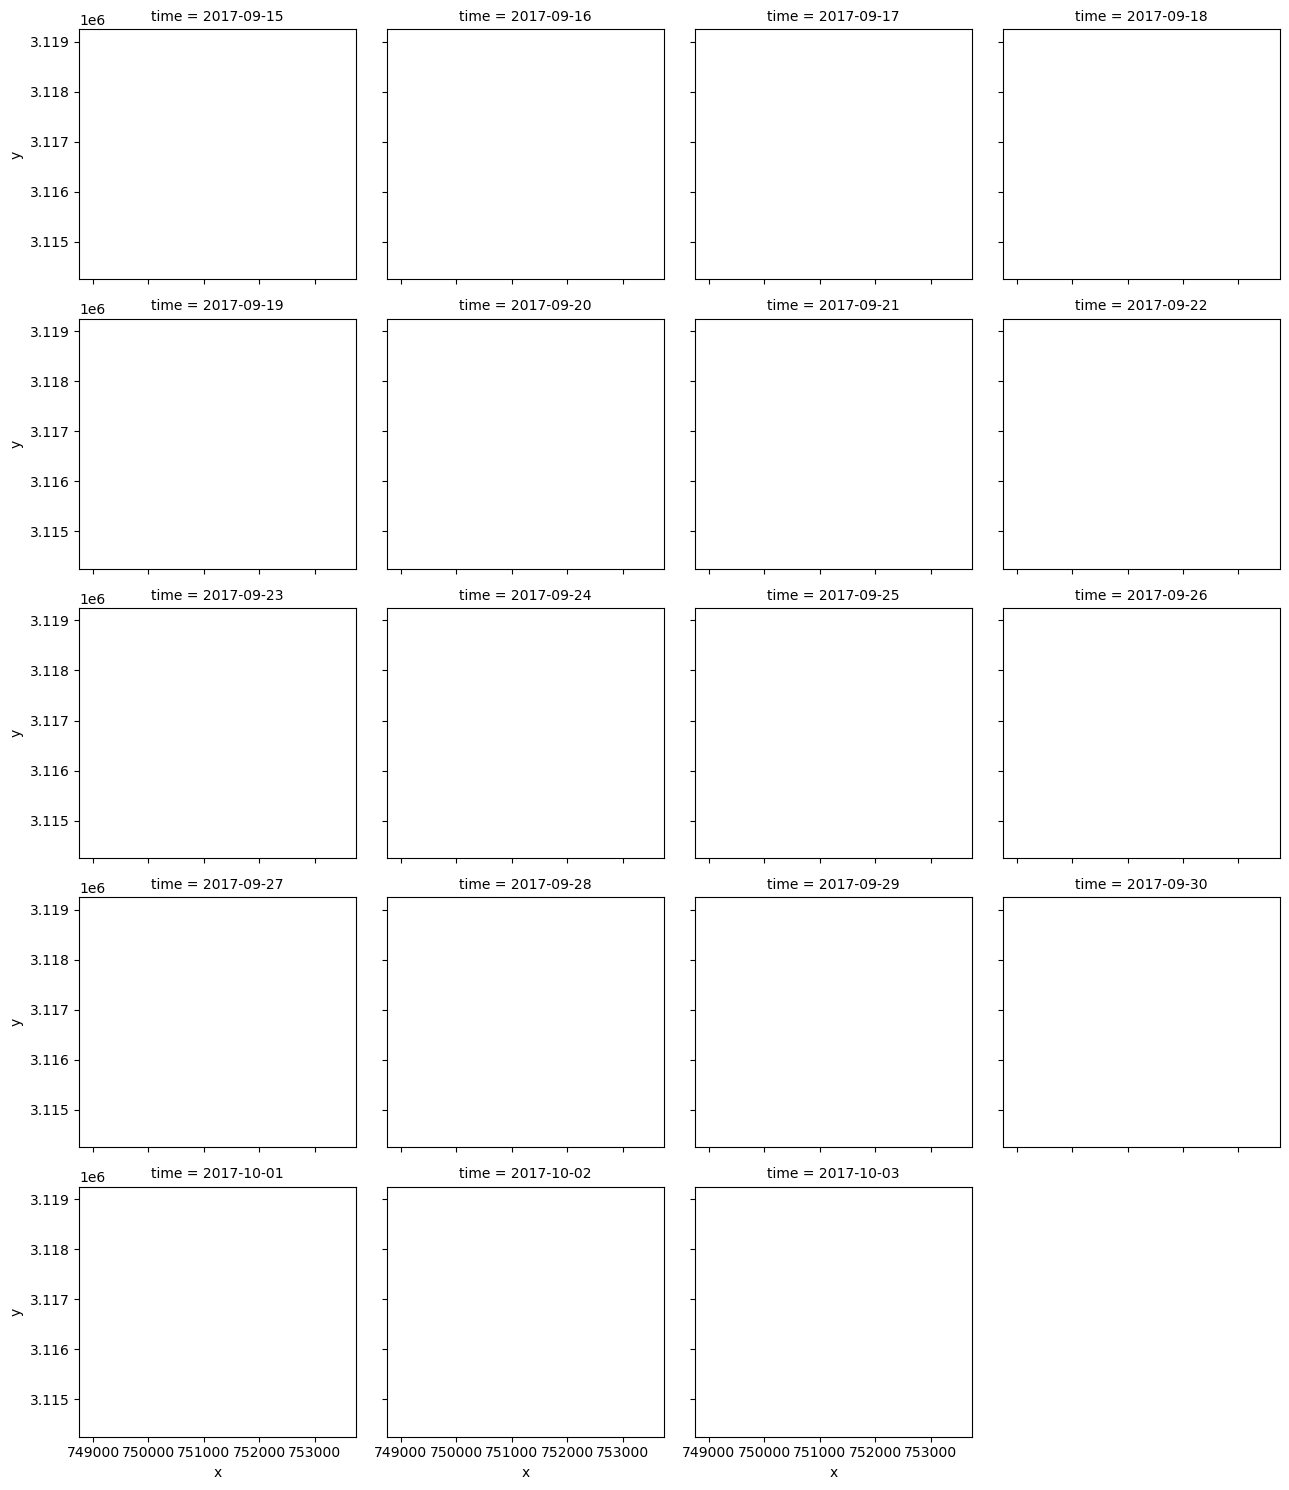

In [19]:
(da.sel(band=['Nadir_Reflectance_Band1', 'Nadir_Reflectance_Band4', 'Nadir_Reflectance_Band3'])/30000000000000).plot.imshow(col="time",col_wrap = 4) # plots all images in chosen range

In [ ]:
def fetch_image_tiles_L8(lat, lon, sdate, edate):
    point = ee.Geometry.Point(lon, lat) # KNS, AS point
        # L8_coll['RAW'] = ee.ImageCollection("LANDSAT/LC08/C02/T1").filterBounds(point).filterDate(sdate, edate)


    # L8_coll = {} # dictionary to store image tiles
    # L8_coll['TOA'] = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").filterBounds(point).filterDate(sdate, edate)
    # L8_coll['SR'] = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterBounds(point).filterDate(sdate, edate)
    # L8_coll['RAW'] = ee.ImageCollection("LANDSAT/LC08/C02/T1").filterBounds(point).filterDate(sdate, edate)
    
    return L8_coll